In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance
from scipy import spatial
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from scipy import stats

%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\kim\\Downloads\\multipleChoiceResponses.csv", encoding='latin-1', low_memory=False)
df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
gender_df = df['GenderSelect'].value_counts()
gender_df = gender_df.to_frame()
gender_df = gender_df.reset_index()
columns = ['Gender','Total']
gender_df.columns = columns

In [4]:
gender_df.head()
grand_total = gender_df.Total.sum()
gender_df['Percent'] = (gender_df.Total/grand_total)*100
gender_df.head()

,Gender,Total,Percent
0,Male,13610,81.884363
1,Female,2778,16.713796
2,A different identity,159,0.956621
3,"Non-binary, genderqueer, or gender non-conforming",74,0.445220


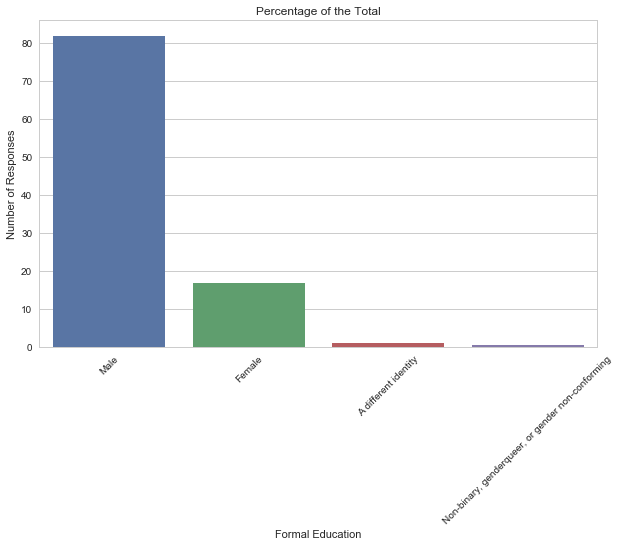

In [5]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
figure = sns.barplot(x='Gender', y='Percent', data=gender_df)
plt.xlabel('Formal Education')
plt.ylabel('Number of Responses')
plt.title('Percentage of the Total')
for tick in figure.get_xticklabels():
    tick.set_rotation(45)
    
# Display this plot in percentages

In [6]:
ed_df = df['FormalEducation'].value_counts()
ed_df = ed_df.to_frame()
ed_df = ed_df.reset_index()
columns = ['Education','Total']
ed_df.columns = columns

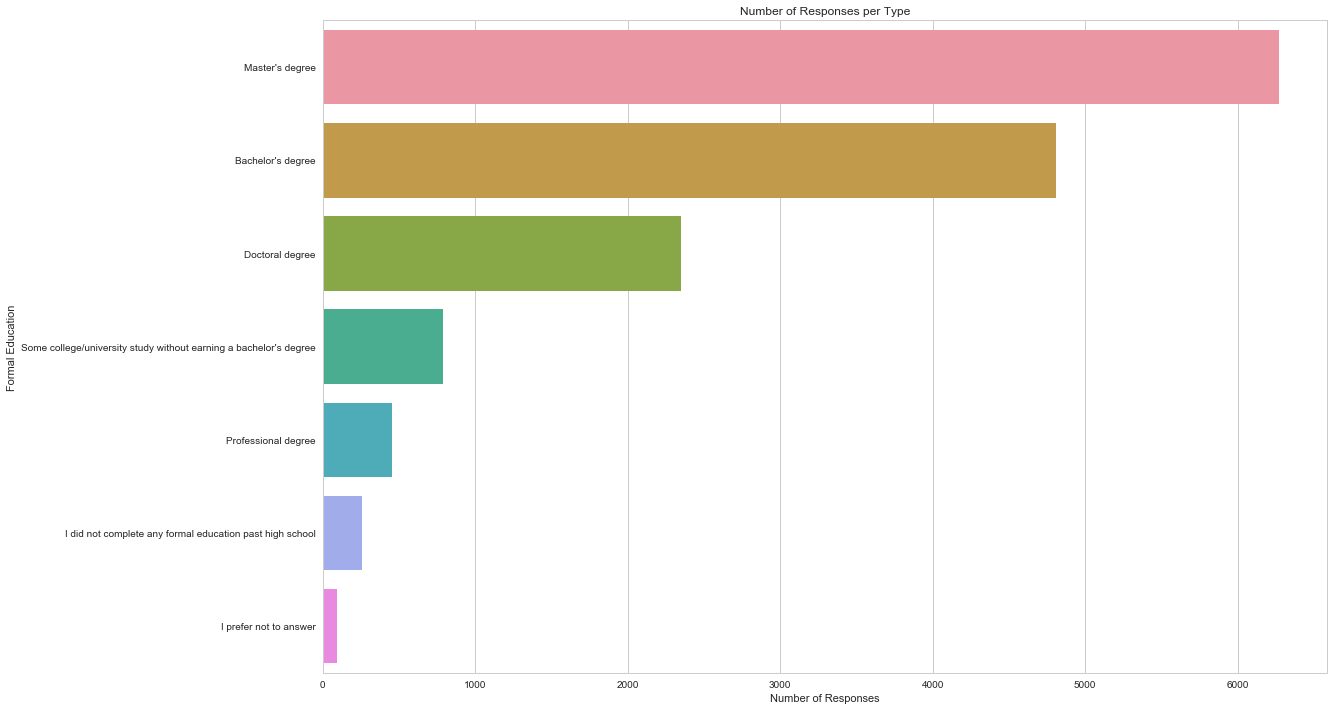

In [7]:
sns.set_style('whitegrid')
plt.figure(figsize=(18, 12))
figure = sns.barplot(x='Total', y='Education', data=ed_df)
plt.xlabel('Number of Responses')
plt.ylabel('Formal Education')
plt.title('Number of Responses per Type')

In [8]:
major_df = df['MajorSelect'].value_counts()
major_df = major_df.to_frame()
major_df = major_df.reset_index()
columns = ['Major','Total']
major_df.columns = columns

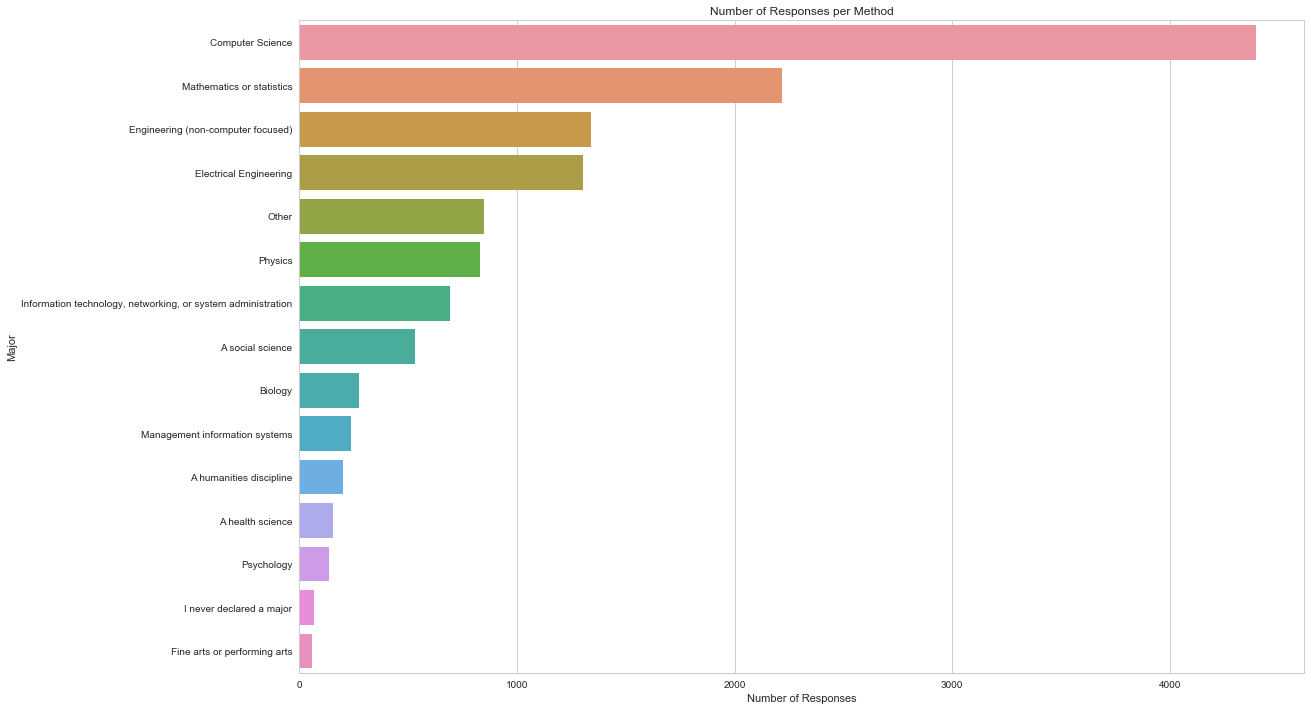

In [9]:
sns.set_style('whitegrid')
plt.figure(figsize=(18, 12))
figure = sns.barplot(x='Total', y='Major', data=major_df)
plt.xlabel('Number of Responses')
plt.ylabel('Major')
plt.title('Number of Responses per Method')

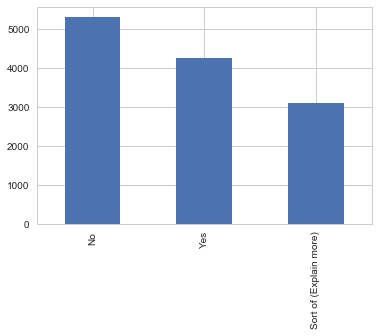

In [10]:
df['DataScienceIdentitySelect'].value_counts()
df['DataScienceIdentitySelect'].value_counts().plot(kind='bar')

In [11]:
groupbyGender = df.groupby(['GenderSelect','DataScienceIdentitySelect']).size().reset_index()
columns = ['GenderSelect', 'DataScienceIdentitySelect','Total']
groupbyGender.columns = columns

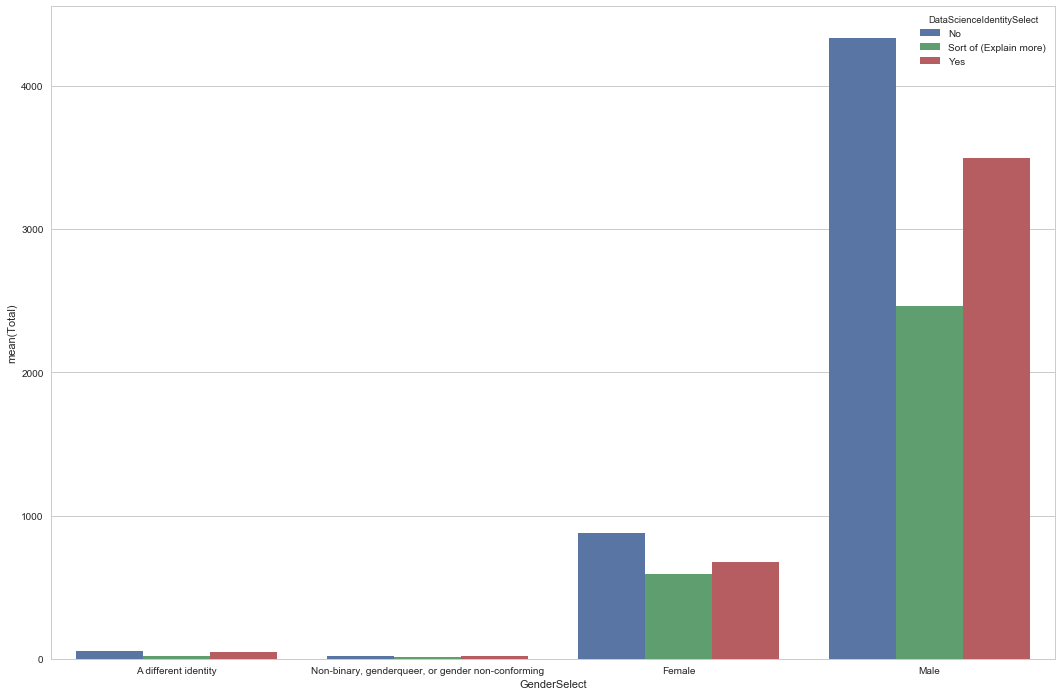

In [12]:
plt.figure(figsize=(18, 12))
sns.barplot(x="GenderSelect", y="Total", hue="DataScienceIdentitySelect", data=groupbyGender,
           order=["A different identity","Non-binary, genderqueer, or gender non-conforming","Female","Male"])

In [13]:
features = pd.DataFrame()

In [14]:
features['Gender'] = df['GenderSelect']

In [15]:
# Label encoding

mask = features.Gender == 'Male'
column_name = 'Gender'
features.loc[mask, column_name] = 0
mask = features.Gender == 'Female'
column_name = 'Gender'
features.loc[mask, column_name] = 1
mask = features.Gender == 'Non-binary, genderqueer, or gender non-conforming'
column_name = 'Gender'
features.loc[mask, column_name] = 2
mask = features.Gender == 'A different identity'
column_name = 'Gender'
features.loc[mask, column_name] = 3
features.head()

,Gender
0,2
1,1
2,0
3,0
4,0


In [16]:
features['Masters'] = np.where(df['FormalEducation']=='Master\'s Degree', 1, 0)
features['PhD'] = np.where(df['FormalEducation']=='Doctoral Degree',1,0)
features['Bachelors'] = np.where(df['FormalEducation']=='Bachelor\'s Degree',1, 0)
features['Some'] = np.where(df['FormalEducation']=='Some college/university study without earning a bachelor\'s degree',1, 0)
features['Professional'] = np.where(df['FormalEducation']=='Professional degree',1, 0)
features['HighSchool'] = np.where(df['FormalEducation']=='I did not complete any formal education past high school',1, 0)
features['NA'] = np.where(df['FormalEducation']=='I prefer not to answer',1, 0)

In [17]:
features['DataScientist'] = df['DataScienceIdentitySelect']
features['DataScientist'] = np.where(features['DataScientist']=='Yes', 1, 0)
features['DataScientist'].value_counts()

0    12459
1     4257
Name: DataScientist, dtype: int64

In [18]:
features['CS'] = np.where(df['MajorSelect']=='Computer Science', 1, 0)
features['MATH'] = np.where(df['MajorSelect']=='Mathematics or statistics',1,0)
features['ENG'] = np.where(df['MajorSelect']=='Engineering (non-computer focused)',1, 0)
features['EE'] = np.where(df['MajorSelect']=='Electrical Engineering',1, 0)
features['Other'] = np.where(df['MajorSelect']=='Other',1, 0)
features['PHY'] = np.where(df['MajorSelect']=='Physics',1, 0)
features['INF'] = np.where(df['MajorSelect']=='Information technology, networking, or system administration',1, 0)
features['SOC'] = np.where(df['MajorSelect']=='A social science',1, 0)
features['BIO'] = np.where(df['MajorSelect']=='Biology',1, 0)
features['MIS'] = np.where(df['MajorSelect']=='Management information systems',1, 0)
features['HUM'] = np.where(df['MajorSelect']=='A humanities discipline',1, 0)
features['HS'] = np.where(df['MajorSelect']=='A health science',1, 0)
features['PSY'] = np.where(df['MajorSelect']=='Psychology',1, 0)
features['NM'] = np.where(df['MajorSelect']=='I never declared a major',1, 0)
features['FA'] = np.where(df['MajorSelect']=='Fine arts or performing arts',1, 0)

In [19]:
features.columns

Index(['Gender', 'Masters', 'PhD', 'Bachelors', 'Some', 'Professional',
       'HighSchool', 'NA', 'DataScientist', 'CS', 'MATH', 'ENG', 'EE', 'Other',
       'PHY', 'INF', 'SOC', 'BIO', 'MIS', 'HUM', 'HS', 'PSY', 'NM', 'FA'],
      dtype='object')

In [20]:
features.dropna(inplace=True)

#X = features[['Gender','Masters','PhD','Bachelors','Some','Professional','HighSchool','NA']].as_matrix()
X = features[['Gender', 'Masters', 'PhD', 'Bachelors', 'Some', 'Professional',
       'HighSchool', 'NA', 'CS', 'MATH', 'ENG', 'EE', 'Other',
       'PHY', 'INF', 'SOC', 'BIO', 'MIS', 'HUM', 'HS', 'PSY', 'NM', 'FA']].as_matrix()
y = features['DataScientist'].as_matrix()

In [21]:
LogReg = LogisticRegression(class_weight = 'balanced')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)

In [22]:
LogReg.score(X,y)

0.48805727693881235

In [23]:
# generate class probabilities
probs = LogReg.predict_proba(X_test)
print(probs)

[[ 0.44563453  0.55436547]
 [ 0.50821404  0.49178596]
 [ 0.73843287  0.26156713]
 ..., 
 [ 0.73843287  0.26156713]
 [ 0.62572368  0.37427632]
 [ 0.49190671  0.50809329]]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002716507D6A0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002716545AC88>]], dtype=object)

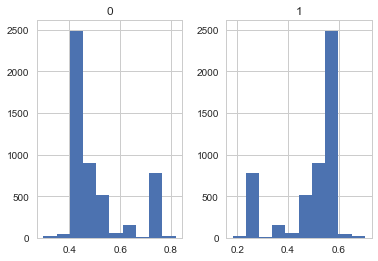

In [24]:
pd.DataFrame(probs).hist()

In [25]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, y_pred))

0.486464808502


In [26]:
features.head()
me = [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
LogReg.predict(me)

C:\Users\kim\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])

In [27]:
np.exp(LogReg.coef_)

array([[ 0.97084091,  1.        ,  1.        ,  1.        ,  0.68335605,
         2.91600707,  1.69459582,  1.64798025,  3.42089271,  4.04630744,
         2.73185301,  3.51192463,  2.88900205,  3.5683296 ,  3.11406217,
         2.78087311,  4.0440308 ,  3.98357429,  1.73936028,  4.85784692,
         4.02122802,  2.01980752,  1.78977337]])

In [28]:
print("Accuracy: %2f" % metrics.accuracy_score(y_test, y_pred))
print("Precision: %2f" % metrics.precision_score(y_test, y_pred, average="macro"))
print("F1: %2f" % metrics.f1_score(y_test, y_pred, average="macro"))

Accuracy: 0.486465
Precision: 0.563387
F1: 0.483529


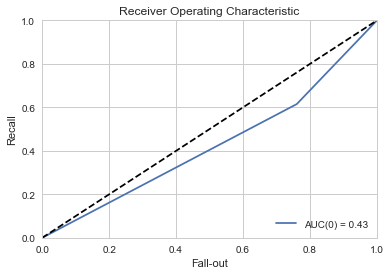

In [29]:
for label in np.arange(1):
    false_positive_rate, recall, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=label)
    roc_auc = metrics.auc(false_positive_rate, recall)
    plt.plot(false_positive_rate, recall, label='AUC(%d) = %0.2f' % (label, roc_auc))

plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

In [30]:
def LogReg_EVERY_feature(feature,X2, y1):
    X2 = X2.reshape((16621,1))
    y1 = y1.reshape((16621,1))
    X_train, X_test, y_train, y_test = train_test_split(X2, y1, test_size = .3, random_state=25)
    
    LogReg = LogisticRegression(class_weight = 'balanced')
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    print(pd.Series(y_pred).value_counts())
    score = LogReg.score(X2,y1)
    print(feature)
    print (LogReg.coef_)
    print(score)
    # generate evaluation metrics
    print(metrics.accuracy_score(y_test, y_pred))

In [31]:
LogReg_EVERY_feature('Gender', features['Gender'].as_matrix(), features['DataScientist'].as_matrix())
LogReg_EVERY_feature('Masters', features['Masters'].as_matrix(), features['DataScientist'].as_matrix())
LogReg_EVERY_feature('PhD', features['PhD'].as_matrix(), features['DataScientist'].as_matrix())
LogReg_EVERY_feature('Bachelors', features['Bachelors'].as_matrix(), features['DataScientist'].as_matrix())
LogReg_EVERY_feature('Some', features['Some'].as_matrix(), features['DataScientist'].as_matrix())
LogReg_EVERY_feature('Professional',features['Professional'].as_matrix(), features['DataScientist'].as_matrix())
LogReg_EVERY_feature('HighSchool', features['HighSchool'].as_matrix(), features['DataScientist'].as_matrix())
LogReg_EVERY_feature('NA', features['NA'].as_matrix(), features['DataScientist'].as_matrix())
LogReg_EVERY_feature('CS', features['CS'].as_matrix(), features['DataScientist'].as_matrix())
LogReg_EVERY_feature('MATH', features['MATH'].as_matrix(), features['DataScientist'].as_matrix())
LogReg_EVERY_feature('ENG', features['ENG'].as_matrix(), features['DataScientist'].as_matrix())
LogReg_EVERY_feature('EE', features['EE'].as_matrix(), features['DataScientist'].as_matrix())
LogReg_EVERY_feature('Other', features['Other'].as_matrix(), features['DataScientist'].as_matrix())
LogReg_EVERY_feature('PHY', features['PHY'].as_matrix(), features['DataScientist'].as_matrix())
LogReg_EVERY_feature('INF', features['INF'].as_matrix(), features['DataScientist'].as_matrix())
LogReg_EVERY_feature('SOC', features['SOC'].as_matrix(), features['DataScientist'].as_matrix())
LogReg_EVERY_feature('BIO', features['BIO'].as_matrix(), features['DataScientist'].as_matrix())
LogReg_EVERY_feature('MIS', features['MIS'].as_matrix(), features['DataScientist'].as_matrix())
LogReg_EVERY_feature('HUM', features['HUM'].as_matrix(), features['DataScientist'].as_matrix())
LogReg_EVERY_feature('HS', features['HS'].as_matrix(), features['DataScientist'].as_matrix())
LogReg_EVERY_feature('PSY', features['PSY'].as_matrix(), features['DataScientist'].as_matrix())
LogReg_EVERY_feature('MN', features['NM'].as_matrix(), features['DataScientist'].as_matrix())
LogReg_EVERY_feature('FA', features['FA'].as_matrix(), features['DataScientist'].as_matrix())

C:\Users\kim\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1    4090
0     897
dtype: int64
Gender
[[-0.03005396]]
0.346970699717
0.355524363345
0    4987
dtype: int64
Masters
[[ 0.]]
0.745262017929
0.729697212753
0    4987
dtype: int64
PhD
[[ 0.]]
0.745262017929
0.729697212753
0    4987
dtype: int64
Bachelors
[[ 0.]]
0.745262017929
0.729697212753
1    4761
0     226
dtype: int64
Some
[[-0.31827695]]
0.283376451477
0.297573691598
0    4847
1     140
dtype: int64
Professional
[[ 0.04088958]]
0.734131520366
0.722879486665
1    4900
0      87
dtype: int64
HighSchool
[[-0.49269549]]
0.264544852897
0.280529376379
0    4955
1      32
dtype: int64
NA
[[ 0.36808691]]
0.743096083268
0.726488871065
0    3697
1    1290
dtype: int64
CS
[[ 0.23087591]]
0.633475723482
0.629436534991
0    4279
1     708
dtype: int64
MATH
[[ 0.3980798]]
0.697370795981
0.680368959294
1    4621
0     366
dtype: int64
ENG
[[-0.04473751]]
0.294386619337
0.301584118709
0    4608
1     379
dtype: int64
EE
[[ 0.22565557]]
0.712772998015
0.699418488069
0    4727
1     260
dtype: int6